In [2]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras, optimizers
import tensorflow_datasets as tfds
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
def generate_model(layers:list = []):
    model = None
    if (len(layers) != 0):
        model = keras.models.Sequential(layers)
    else:
        model = keras.models.Sequential([
            keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(150, 150, 3)),
            keras.layers.MaxPooling2D(2, 2),
            keras.layers.Dropout(rate=0.15),
            
            keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
            keras.layers.MaxPooling2D(2, 2),
            keras.layers.Dropout(rate=0.1),

            keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
            keras.layers.MaxPooling2D(2, 2),
            keras.layers.Dropout(rate=0.1),

            keras.layers.Flatten(),

            keras.layers.Dense(512, activation="relu"),

            keras.layers.Dense(3, activation="softmax")
        ])

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

    return model

In [4]:
path_to_animals = Path("../data/animals")

def train_test_animals():
    
    train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.25)
    train_generator = train_datagen.flow_from_directory(path_to_animals / "train", target_size=(150, 150), batch_size=15, class_mode="categorical", subset="training") # target_size: Resize images
    test_generator = train_datagen.flow_from_directory(path_to_animals / "validation", target_size=(150, 150), batch_size=15, class_mode="categorical", subset="validation")
    epochs = 2
    model = generate_model()
    history = model.fit(train_generator, steps_per_epoch=150, epochs=epochs, validation_data=test_generator, validation_steps=50, verbose=1)

    return history


In [8]:
history = train_test_animals()


Found 2205 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/2


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


147/150 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - acc: 0.4189 - loss: 1.1802

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 185ms/step - acc: 0.4210 - loss: 1.1754 - val_acc: 0.6000 - val_loss: 0.6006
Epoch 2/2
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - acc: 0.6575 - loss: 0.6937 - val_acc: 0.6667 - val_loss: 0.6036


## Plot 

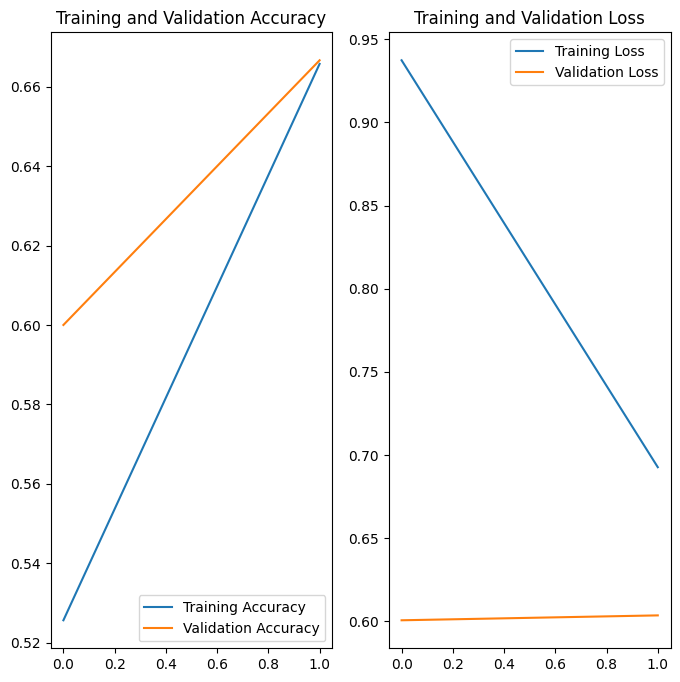

Training Accuracy:
0.6657596230506897
Testing Accuracy:
0.6666666865348816


(None, None)

In [10]:
epochs = 2
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
#This code is used to plot the training and validation accuracy
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# returns accuracy of training
print("Training Accuracy:"), print(history.history['acc'][-1])
print("Testing Accuracy:"), print (history.history['val_acc'][-1])

---

- reuse the image generator for file paths

In [15]:
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.25)
train_generator = train_datagen.flow_from_directory(path_to_animals / "train", target_size=(150, 150), batch_size=15, class_mode="categorical", subset="training") # target_size: Resize images
test_generator = train_datagen.flow_from_directory(path_to_animals / "validation", target_size=(150, 150), batch_size=15, class_mode="categorical", subset="validation")

train_paths = train_generator.filepaths
test_paths = test_generator.filepaths

Found 2205 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [45]:
def get_img_label(img_path: str):
    if ("cat" in img_path):
        return 0
    elif ("dog" in img_path):
        return 1
    else:
        return 2
    

train_labels = np.array([get_img_label(path) for path in train_paths])
test_labels = np.array([get_img_label(path) for path in test_paths])
# len(test_paths)
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [48]:
from PIL import Image
train_imgs = []
test_imgs = []

for path in train_paths:
    temp = Image.open(path)
    temp = np.array(temp.resize((150, 150)))
    train_imgs.append(temp.reshape(temp.shape[0], -1))
    # print(temp.size)
    # break

for path in test_paths:
    temp = Image.open(path)
    temp = np.array(temp.resize((150, 150)))
    test_imgs.append(temp.reshape(temp.shape[0], -1))

# train_imgs = np.array(train_imgs)
# test_imgs = np.array(test_imgs)



150

In [63]:
temp = []
for img in train_imgs:
    temp.append(img.shape)

temp = np.array(temp)
temp[:, 1]

array([450, 450, 450, ..., 450, 450, 450])

## Softmax (logistic multinomial) predict

In [47]:
from sklearn.linear_model import LogisticRegression
softmax_model = LogisticRegression(multi_class="multinomial", max_iter=100, random_state=192)
softmax_model.fit(train_imgs, train_labels)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2205, 150) + inhomogeneous part.